In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

# Quantum Circuit implementation of the Teleportation protocol.

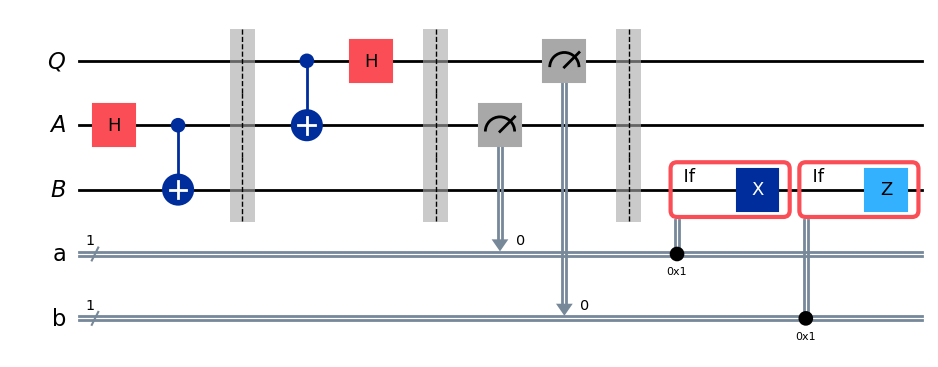

In [65]:
# Define Quantum Registers for qubit, entangled qubits (ebit0 and ebit1), and Classical Registers (a and b)
qubit = QuantumRegister(1, 'Q')   # Quantum register for the qubit to be teleported
ebit0 = QuantumRegister(1, 'A')   # Quantum register for Alice's entangled qubit 0
ebit1 = QuantumRegister(1, 'B')   # Quantum register for Alice's entangled qubit 1
a = ClassicalRegister(1, 'a')     # Classical register for measurement outcome of qubit
b = ClassicalRegister(1, 'b')     # Classical register for measurement outcome of ebit0

# Create a Quantum Circuit named 'protocol' using the defined registers
protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)



# Prepare ebit used for teleportation
protocol.h(ebit0)           # Apply a Hadamard gate to entangled qubit ebit0
                            # This operation puts ebit0 into a superposition state

protocol.cx(ebit0, ebit1)   # Apply a controlled-X (CX) gate between ebit0 (control qubit) and ebit1 (target qubit)
                            # This operation entangles ebit0 and ebit1, preparing them for teleportation

protocol.barrier()          # Insert a barrier to visually and logically separate sections of the circuit
                            # Ensures the separation of the preparation phase from subsequent operations
                            



# Alice's operations
protocol.cx(qubit, ebit0)   # Apply a controlled-X (CX) gate between qubit (control) and ebit0 (target)
                            # This operation entangles the qubit and ebit0
                            
protocol.h(qubit)           # Apply a Hadamard gate to qubit
                            # This operation puts qubit into a superposition state, preparing it for measurement in the quantum teleportation protocol
                            
protocol.barrier()          # This barrier ensures the separation of Alice's operations from the rest of the protocol, maintaining the intended sequence of operations




# Alice measures and sends classical bits to Bob
protocol.measure(ebit0, a)  # Measure the state of ebit0 and store the result in classical register a
                            # This captures the result of ebit0's measurement for classical communication

protocol.measure(qubit, b)  # Measure the state of ebit1 and store the result in classical register b
                            # This captures the result of ebit1's measurement for classical communication

protocol.barrier()          # Ensures the separation of the measurement phase from subsequent operations


# Bob uses the classical bits to conditionally apply gates
with protocol.if_test((a, 1)):  # If the classical bit a is 1
    protocol.x(ebit1)           # Apply an X gate to ebit1
                                # This operation corrects ebit1's state based on Alice's measurement result a

with protocol.if_test((b, 1)):  # If the classical bit b is 1
    protocol.z(ebit1)           # Apply a Z gate to ebit1
                                # This operation corrects ebit1's state based on Alice's measurement result b


display(protocol.draw(output="mpl"))



In [69]:
# Define a random gate with random parameters for theta, phi, and lambda
randomGate = UGate(
    theta=random.random() * 2 * pi,  # Random value for theta between 0 and 2π
    phi=random.random() * 2 * pi,    # Random value for phi between 0 and 2π
    lam=random.random() * 2 * pi,    # Random value for lambda between 0 and 2π
)

# Display the matrix representation of the random gate
display(randomGate.to_matrix())  # Convert the gate to its matrix form and display it

array([[ 0.70006401+0.j        ,  0.07852125+0.70974981j],
       [-0.71255326-0.04667145j,  0.03133752+0.69936227j]])

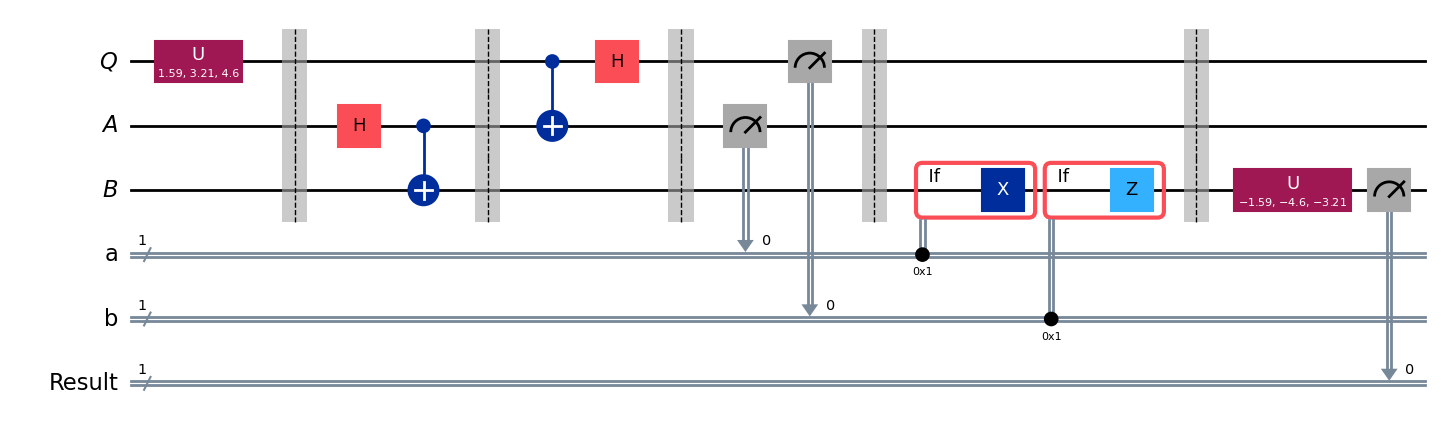

In [70]:
#To test that the protocol works correctly, we'll apply a randomly generated single-qubit gate
# to the initialized ∣0⟩ state of Q to obtain a random quantum state vector  to be teleported. 
# By applying the inverse (i.e., conjugate transpose) of that gate to B
# after the protocol is run, we can verify that the state was teleported by measuring to 
# see that it has returned to the ∣0⟩



# Create a new circuit including the same bits and qubits used in the teleportation protocol
test = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Start with the randomly selected gate on Q
test.append(randomGate, qubit)  # Apply the randomly selected gate to qubit Q
                                # This applies the random UGate to qubit Q

test.barrier()                  # Ensures the separation of the random gate application from subsequent operations

# Append the entire teleportation protocol from above
test = test.compose(protocol)   # Append the previously defined teleportation protocol to the current circuit
                                # This incorporates the full teleportation protocol into the new circuit

test.barrier()                  # Ensures the separation of the teleportation protocol from subsequent operations




# Finally, apply the inverse of the random unitary to B and measure.
test.append(randomGate.inverse(), ebit1)  # Apply the inverse of the random unitary gate to qubit B
                                          # This operation aims to reverse the effect of the random unitary gate

result = ClassicalRegister(1, "Result")   # Create a new classical register to store the measurement result
test.add_register(result)                 # Add the new classical register to the circuit

test.measure(ebit1, result)               # Measure the state of qubit B and store the result in the classical register "Result"
                                          # This captures the final state of ebit1 after applying the inverse gate

display(test.draw(output="mpl"))



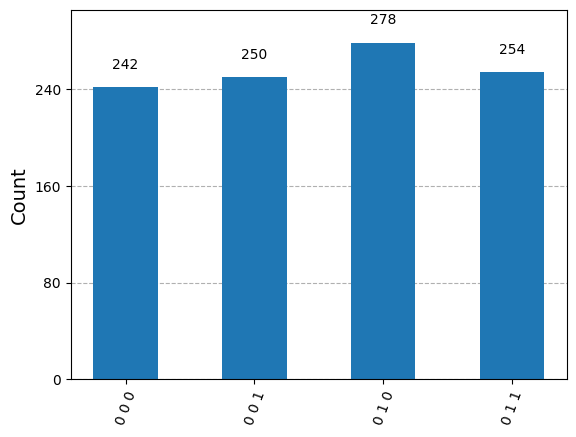

In [72]:
# Finally, let's run the Aer simulator on this circuit and plot a histogram of the outputs.
# We'll see the statistics for all three classical bits:(100, 101, 111) the bottom/leftmost bit should always be 0, 
# indicating that the qubit Q was successfully teleported into B, while the other two bits should be roughly uniform.


result = AerSimulator().run(test).result()  # Run the quantum circuit on the Aer simulator and get the result
                                            # This executes the circuit using the Aer simulator backend

statistics = result.get_counts()            # Get the measurement counts from the result
                                            # This retrieves the count statistics of the measurement outcomes

display(plot_histogram(statistics))         # This visualizes the distribution of the measurement outcomes


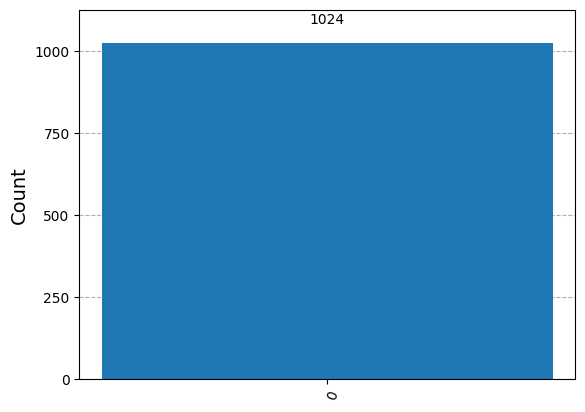

In [75]:
# We can also filter the statistics to focus just on the test result qubit if we wish

filteredStatistic = marginal_distribution(statistics, [2])
display(plot_histogram(filteredStatistic))

# Quantum Circuit implementation of the Superdense protocol.

In [88]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram

In [89]:
c = '1'
d = '0'

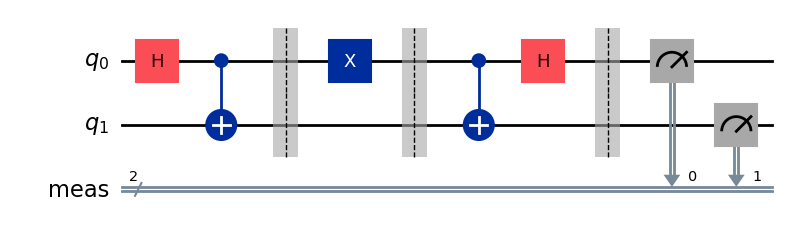

In [90]:
# Now we'll build the circuit accordingly. 
# Here we'll just allow Qiskit to use the default names for the qubits: 𝑞0 ​ for the top qubit and q1 ​ for the bottom one.


# Create a quantum circuit with 2 qubits
protocol = QuantumCircuit(2)

# Prepare an entangled state (ebit) used for superdense coding
protocol.h(0)       # Apply Hadamard gate to the first qubit to create a superposition
protocol.cx(0, 1)   # Apply CNOT gate to entangle the first and second qubits
protocol.barrier()  # Add a barrier to visually separate different parts of the circuit


# Alice's operations for encoding the message
if d == "1": 
    protocol.z(0)   # Apply Z gate if d is 1 to flip the phase of the first qubit
if c == "1":
    protocol.x(0)   # Apply X gate if c is 1 to flip the state of the first qubit
protocol.barrier()  # Add a barrier to visually separate different parts of the circuit


# Bob's actions for decoding the message
protocol.cx(0, 1)       # Apply CNOT gate with the first qubit as control and the second qubit as target
protocol.h(0)           # Apply Hadamard gate to the first qubit to decode the information
protocol.measure_all()  # Measure all qubits to retrieve the encoded information

# Print the circuit
display(protocol.draw(output='mpl'))





Measured 10 with frequency 1.0


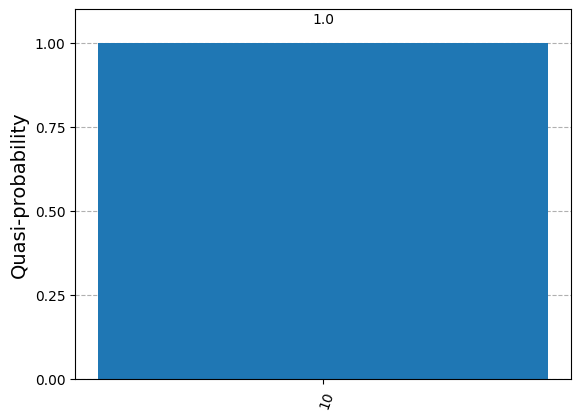

In [93]:
# Running the Aer simulator produces the expected output.

result = Sampler().run(protocol).result()                   # Run the 'protocol' using custom Sampler and retrieve the result

statistics = result.quasi_dists[0].binary_probabilities()   # Obtain binary probabilities from the first quasi distribution

for outcome, frequency in statistics.items():
    print(f"Measured {outcome} with frequency {frequency}")  # Print each outcome and its frequency
    
    

display(plot_histogram(statistics))



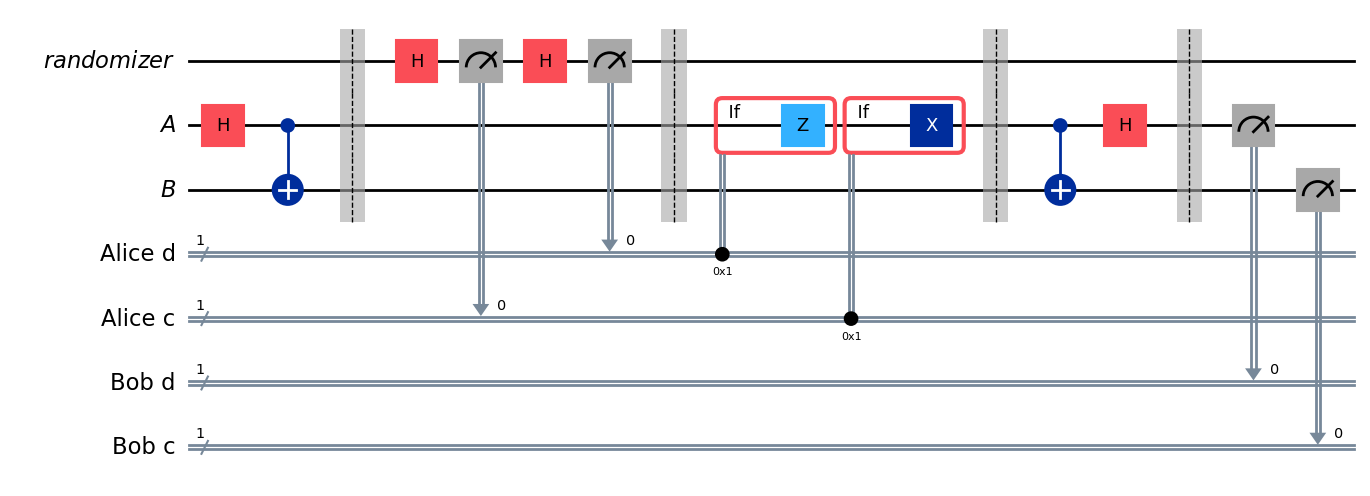

In [99]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram

# Just for fun, we can use an additional qubit as a random bit generator to randomly choose c and d,
# then run the superdense coding protocol to see that these bits are transmitted correctly.

# Create quantum and classical registers
rbg = QuantumRegister(1, "randomizer")      # Quantum register for the random bit generator
ebit0 = QuantumRegister(1, "A")             # Qubit 'A' as part of the entangled pair (ebit) shared with Bob
ebit1 = QuantumRegister(1, "B")             # Qubit 'B' as part of the entangled pair (ebit) shared with Alice

Alice_c = ClassicalRegister(1, "Alice c")   # Classical register for Alice's bit 'c'
Alice_d = ClassicalRegister(1, "Alice d")   # Classical register for Alice's bit 'd'

# Initialize the quantum circuit with all registers
test = QuantumCircuit(rbg, ebit0, ebit1, Alice_d, Alice_c)

# Initialize the ebit (entangled bit)
test.h(ebit0)              # Apply Hadamard gate to qubit 'A' to create superposition
test.cx(ebit0, ebit1)      # Apply CNOT gate to entangle qubit 'A' (control) with qubit 'B' (target)
test.barrier()             # Add a barrier to visually separate different parts of the circuit

# Use the 'randomizer' qubit twice to generate Alice's bits c and d
test.h(rbg)                # Apply Hadamard gate to the 'randomizer' qubit to create superposition (generate random bit for 'c')
test.measure(rbg, Alice_c) # Measure the 'randomizer' qubit and store the result in 'Alice_c'
test.h(rbg)                # Apply Hadamard gate again to the 'randomizer' qubit (generate random bit for 'd')
test.measure(rbg, Alice_d) # Measure the 'randomizer' qubit and store the result in 'Alice_d'
test.barrier()             # Add a barrier to visually separate different parts of the circuit

# Now the protocol runs, starting with Alice's actions, which depend on her bits
with test.if_test((Alice_d, 1), label="Z"):  # If Alice's bit 'd' is 1
    test.z(ebit0)                            # Apply Z gate to qubit 'A' (flip the phase)
with test.if_test((Alice_c, 1), label="X"):  # If Alice's bit 'c' is 1
    test.x(ebit0)                            # Apply X gate to qubit 'A' (flip the state)
test.barrier()                               # Add a barrier to visually separate different parts of the circuit

# Bob's actions
test.cx(ebit0, ebit1)       # Apply CNOT gate with qubit 'A' as control and qubit 'B' as target to disentangle
test.h(ebit0)               # Apply Hadamard gate to qubit 'A' to complete the decoding process
test.barrier()              # Add a barrier to visually separate different parts of the circuit

# Create classical registers for Bob to store the decoded bits
Bob_c = ClassicalRegister(1, "Bob c")   # Classical register for Bob to store the decoded bit 'c'
Bob_d = ClassicalRegister(1, "Bob d")   # Classical register for Bob to store the decoded bit 'd'

test.add_register(Bob_d)    # Add Bob's 'd' classical register to the circuit
test.add_register(Bob_c)    # Add Bob's 'c' classical register to the circuit

# Measure the entangled qubits and store the results in Bob's classical registers
test.measure(ebit0, Bob_d)  # Measure qubit 'A' and store the result in Bob's 'd' classical register
test.measure(ebit1, Bob_c)  # Measure qubit 'B' and store the result in Bob's 'c' classical register

display(test.draw(output="mpl"))        # Display the quantum circuit diagram



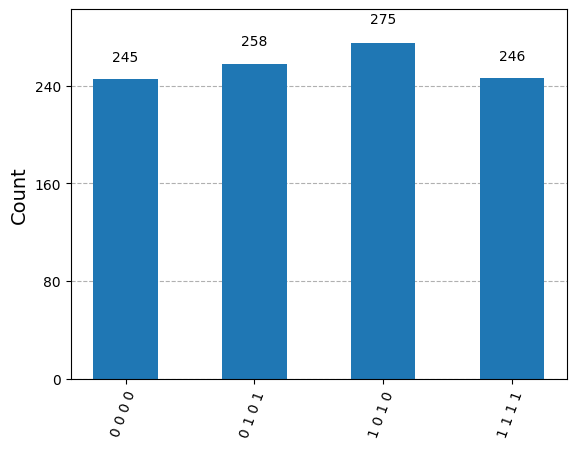

In [100]:
#Running the Aer simulator shows the results: Alice and Bob's classical bits always agree.

result = AerSimulator().run(test).result()  # Run the circuit 'test' using AerSimulator and get the result
statistics = result.get_counts()            # Get the counts of the measurement outcomes
display(plot_histogram(statistics))         # Display a histogram plot of the measurement results


# The CHSH game

In [101]:
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler
from numpy import pi
from numpy.random import randint

In [109]:
def chsh_game(strategy):
    """Plays the CHSH game
    Args:
        strategy (callable): A function that takes two bits (as `int`s) and
            returns two bits (also as `int`s). The strategy must follow the
            rules of the CHSH game.
    Returns:
        int: 1 for a win, 0 for a loss.
    """
    # Referee chooses x and y randomly
    x, y = randint(0, 2), randint(0, 2)
    
    # Use strategy to choose a and b
    a, b = strategy(x, y)
    
    # Referee decides if Alice and Bob win or lose
    if (a != b) == (x & y):
        return 1  # Win condition
    return 0      # Loss condition


In [111]:
def chsh_circuit(x, y):
    """Creates a `QuantumCircuit` that implements the best CHSH strategy.
    Args:
        x (int): Alice's bit (must be 0 or 1)
        y (int): Bob's bit (must be 0 or 1)
    Returns:
        QuantumCircuit: Circuit that, when run, returns Alice and Bob's
            answer bits.
    """
    qc = QuantumCircuit(2, 2)  # Initialize a quantum circuit with two qubits and two classical bits
    qc.h(0)                    # Apply a Hadamard gate to qubit 0
    qc.cx(0, 1)                # Apply a CNOT gate with qubit 0 as control and qubit 1 as target
    qc.barrier()               # Barrier to separate initialization from operations
    
    # Alice's part
    if x == 0:
        qc.ry(0, 0)            # Rotate qubit 0 around the Y axis by 0 (identity operation)
    else:
        qc.ry(-pi/2, 0)        # Rotate qubit 0 around the Y axis by -pi/2 radians
    
    qc.measure(0, 0)           # Measure qubit 0 and store result in classical bit 0
    
    # Bob's part
    if y == 0:
        qc.ry(-pi/4, 1)        # Rotate qubit 1 around the Y axis by -pi/4 radians
    else:
        qc.ry(pi/4, 1)         # Rotate qubit 1 around the Y axis by pi/4 radians
    
    qc.measure(1, 1)           # Measure qubit 1 and store result in classical bit 1
    
    return qc                  # Return the quantum circuit


(x,y) = (0,0)


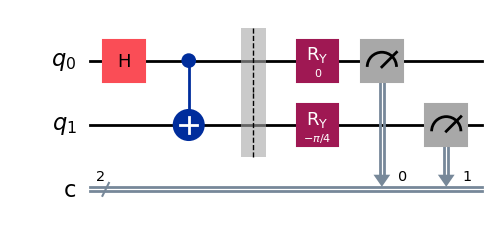

(x,y) = (0,1)


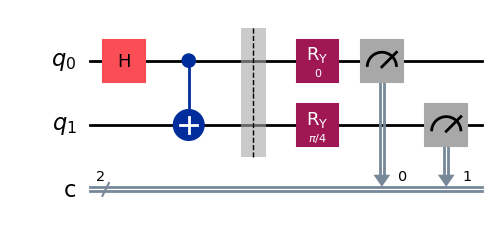

(x,y) = (1,0)


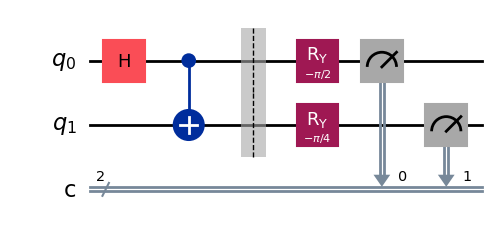

(x,y) = (1,1)


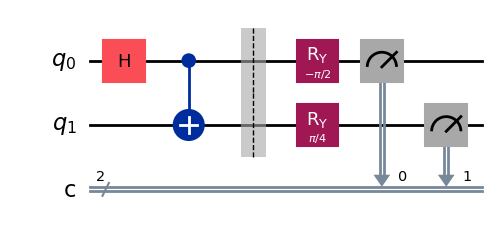

In [106]:
# Draw the four possible circuits

# Draw the circuit for (x,y) = (0,0)
print("(x,y) = (0,0)")
display(chsh_circuit(0,0).draw(output="mpl"))

# Draw the circuit for (x,y) = (0,1)
print("(x,y) = (0,1)")
display(chsh_circuit(0,1).draw(output="mpl"))

# Draw the circuit for (x,y) = (1,0)
print("(x,y) = (1,0)")
display(chsh_circuit(1,0).draw(output="mpl"))

# Draw the circuit for (x,y) = (1,1)
print("(x,y) = (1,1)")
display(chsh_circuit(1,1).draw(output="mpl"))


In [112]:
#Now we'll create a job using the Aer simulator that runs the circuit a single time for a given input pair(x,y).

def quantum_strategy(x, y):
    """Carry out the best strategy for the CHSH game.
    Args:
        x (int): Alice's bit (must be 0 or 1)
        y (int): Bob's bit (must be 0 or 1)
    Returns:
        (int, int): Alice and Bob's answer bits (respectively)
    """
    # `shots=1` runs the circuit once
    result = Sampler().run(chsh_circuit(x,y), shots=1).result()     # Run the circuit for input pair (x, y)
    statistics = result.quasi_dists[0].binary_probabilities()       # Get binary probabilities from the first quasi distribution
    bits = list(statistics.keys())[0]                               # Extract the outcome bits from the statistics
    a, b = bits[0], bits[1]                                         # Assign Alice's and Bob's bits from the outcome
    
    return a, b



In [113]:
# Finally, we'll play the game 1,000 times and compute the fraction of them that the strategy wins.
num_games = 1000
total_scores = 0


for _ in range(num_games):                       # Iterate over the number of games
    total_scores += chsh_game(quantum_strategy)  # Play the CHSH game using the quantum strategy and accumulate scores

# Calculate and print the win percentage
print(f"The possibility of winning {(total_scores / num_games) * 100}%")


The possibility of winning 86.0%


In [117]:
#We can also define a classical strategy and see how well it works. Feel free to change the code to try out different strategies!

def classical_strategy(x, y):
    """An optimal classical strategy for the CHSH game
    Args:
        x (int): Alice's bit (must be 0 or 1)
        y (int): Bob's bit (must be 0 or 1)
    Returns:
        (int, int): Alice and Bob's answer bits (respectively)
    """
    #Alice's answer
    if x==0:
        a=0
    elif x==1:
        a=1
    
    #Bob's Answer
    if y==0:
        b=1
    elif y==1:
        b=0
    
    return a, b

In [118]:
# Again let's play the game 1,000 times to see how well it works.

num_games = 1000
total_scores = 0

for _ in range(num_games):
    total_scores += chsh_game(classical_strategy)
    
print(f"The possibility of winning {(total_scores / num_games) * 100}%")


The possibility of winning 74.5%
